<a href="https://colab.research.google.com/github/BeataStultica/II_graphic_collab/blob/main/laba7_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization

In [3]:
import zipfile
from google.colab import drive

drive.mount("/content/gdrive")
zip_file = '/content/gdrive/MyDrive/cats.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
fpath = "/content/cats/"
random_seed = 42

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nCategories = ", len(categories))

List of categories =  ['norwegian_forest', 'caracal', 'sphinx', 'british'] 

Categories =  4


In [5]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))

No. of images loaded =  4043 
No. of labels loaded =  4043


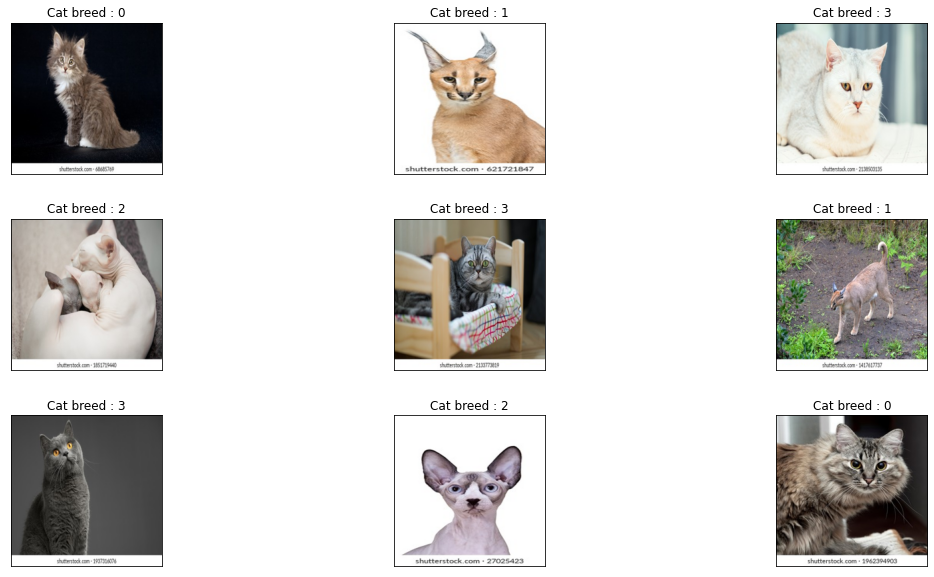

In [6]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Cat breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

images = np.array(images)
labels = np.array(labels)
display_rand_images(images, labels)

In [7]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255

In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3234, 227, 227, 3)
y_train shape =  (3234,)

x_test shape =  (809, 227, 227, 3)
y_test shape =  (809,)


In [9]:
model=Sequential()


model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))


model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))


model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))


model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))


model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))


model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())


model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())


model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())


model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

model.add(Dense(4,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=100, batch_size = 64, validation_data=(x_test, y_test), 
          steps_per_epoch=len(x_train)//64, validation_steps=len(x_test)//64)

Epoch 1/100
50/50 [==============================] - 18s 100ms/step - loss: 1.9248 - accuracy: 0.3541 - val_loss: 33.0014 - val_accuracy: 0.2578
Epoch 2/100
50/50 [==============================] - 4s 70ms/step - loss: 1.4459 - accuracy: 0.4158 - val_loss: 5.3612 - val_accuracy: 0.2383
Epoch 3/100
50/50 [==============================] - 4s 72ms/step - loss: 1.3171 - accuracy: 0.4505 - val_loss: 2.4947 - val_accuracy: 0.3099
Epoch 4/100
50/50 [==============================] - 3s 67ms/step - loss: 1.2758 - accuracy: 0.4502 - val_loss: 1.8582 - val_accuracy: 0.3477
Epoch 5/100
50/50 [==============================] - 3s 67ms/step - loss: 1.1933 - accuracy: 0.5022 - val_loss: 2.6442 - val_accuracy: 0.3359
Epoch 6/100
50/50 [==============================] - 3s 67ms/step - loss: 1.1596 - accuracy: 0.5256 - val_loss: 4.0226 - val_accuracy: 0.2409
Epoch 7/100
50/50 [==============================] - 3s 68ms/step - loss: 1.0836 - accuracy: 0.5514 - val_loss: 2.2890 - val_accuracy: 0.2643
Epo

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

26/26 [==============================] - 1s 23ms/step - loss: 2.7598 - accuracy: 0.5389
2.7597641944885254 0.538936972618103
